In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Administrator/Downloads/sonar.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [4]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [5]:
df[60]=df[60].map({"R":1,"M":0})

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [7]:
x=df.drop(columns=[60])
y=df[60]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [11]:
ypred=model.predict(xtest)

Accuracy is : 0.6428571428571429
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        21
           1       0.69      0.52      0.59        21

    accuracy                           0.64        42
   macro avg       0.65      0.64      0.64        42
weighted avg       0.65      0.64      0.64        42



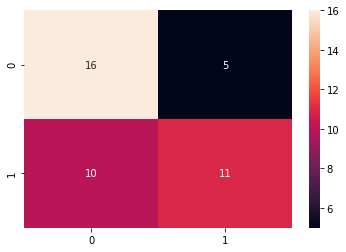

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

# Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(sc_xtrain,ytrain)

KNeighborsClassifier()

In [14]:
ypred=model.predict(sc_xtest)

Accuracy is : 0.7142857142857143
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.71      0.71      0.71        21

    accuracy                           0.71        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42



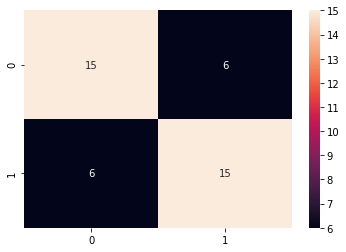

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

# Tuning

In [16]:
#model 
model=KNeighborsClassifier()
#parameter grid
#1. n_neighbors 
#2.weights
#3.Metric
n_neighbors=range(1,31)
weights =['uniform', 'distance']
metric=["minkowski","euclidean","manhattan"]
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(sc_xtrain,ytrain)

In [17]:
res.best_score_

0.8693404634581103

In [18]:
res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=11,metric='manhattan',weights= 'uniform')
model.fit(sc_xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [20]:
ypred=model.predict(sc_xtest)

Accuracy is : 0.7380952380952381
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.81      0.62      0.70        21

    accuracy                           0.74        42
   macro avg       0.75      0.74      0.73        42
weighted avg       0.75      0.74      0.73        42



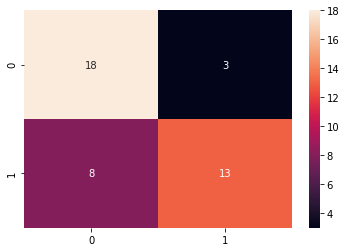

In [21]:
#evaluation 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

# Support vector machine

In [22]:
from sklearn.svm import SVC
model=SVC(C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.89      0.81      0.85        21

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



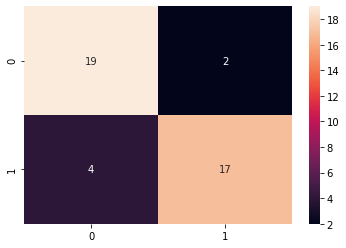

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning

In [24]:
#model
model=SVC()
#parameters
kernel=['linear','poly','rbf','sigmoid']
C=[1,0.1,0.01,0.001]
#grid
grid=dict(kernel=kernel,C=C)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'C': 1, 'kernel': 'poly'}
0.7911467617349969


In [26]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='poly')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.82      0.86      0.84        21

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



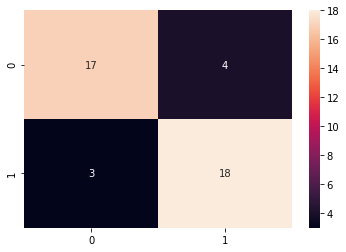

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Naive Bayes Therom

### GaussianNB

In [28]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB()

In [29]:
ypred=model.predict(xtest)

Accuracy is : 0.7619047619047619
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.74      0.81      0.77        21

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



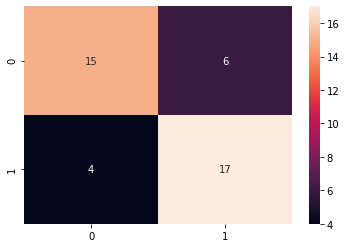

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.6904761904761905
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.75      0.57      0.65        21

    accuracy                           0.69        42
   macro avg       0.70      0.69      0.69        42
weighted avg       0.70      0.69      0.69        42



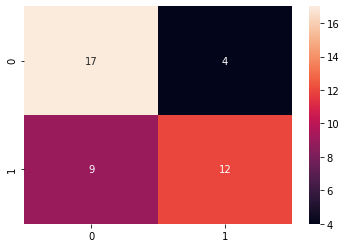

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))